In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from behav import plotting, utils, loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
pd.set_option('display.max_columns', 500)

/home/AD/tsainbur/anaconda3/envs/cdcp_paper/lib/python3.6/site-packages/ipykernel_launcher.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  """


In [3]:
from cdcp.experiment_info import subjects
from cdcp.paths import DATA_PATH_MAGPI
from cdcp.behavior.data import prepare_behavior_data
from cdcp.visualization.colors import colors
from cdcp.behavior.visualize_behavior import plot_stages
subjects, DATA_PATH_MAGPI

(('B1174',
  'B1426',
  'B1170',
  'B1432',
  'B1437',
  'B1433',
  'B1597',
  'B1427',
  'B1188',
  'B1244',
  'B1590',
  'B1399',
  'B1591',
  'B1252',
  'B1110',
  'B1390',
  'B1248',
  'B1593',
  'B1595',
  'B1276'),
 PosixPath('/mnt/cube/RawData/Magpi'))

In [4]:
%matplotlib inline

### load data

In [5]:
## Runs the plotting code on my data
behav_data = loading.load_data_pandas(['B1597'],DATA_PATH_MAGPI)['B1597']

In [6]:
behav_data = behav_data[behav_data.rt.isnull()==False]

In [7]:
behav_data = behav_data[-100000:]

In [8]:
behav_data[:3]

,session,index,type_,stimulus,class_,response,correct,rt,reward,punish,cue_class,cue_id,cue_prob,num_stims,flip_cues,binary_choice,cueing,left_stim,right_stim,interpolation_point,prob_cue,prob_cued_no_cue,data_file,self_initiated
time,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-17 17:14:06.566014,47.0,20.0,normal,/home/bird/opdat/cdp_stimuli/BG/CR1/CR1_BG_017...,R,R,True,0.703234,False,False,CR,CR1,0.875,3.0,False,False,True,B,G,17.0,0.8,0.2,/mnt/cube/RawData/Magpi/B1597/B1597_trialdata_...,NaN
2021-04-17 17:14:11.846466,47.0,21.0,normal,/home/bird/opdat/cdp_stimuli/AE/CR0/CR0_AE_028...,R,R,True,0.890750,False,False,CR,CR0,0.750,3.0,False,False,True,A,E,28.0,0.8,0.2,/mnt/cube/RawData/Magpi/B1597/B1597_trialdata_...,NaN
2021-04-17 17:14:17.669401,47.0,22.0,normal,/home/bird/opdat/cdp_stimuli/BE/CR1/CR1_BE_120...,L,L,True,0.516516,True,False,CR,CR1,0.875,3.0,False,False,True,B,E,120.0,0.8,0.2,/mnt/cube/RawData/Magpi/B1597/B1597_trialdata_...,NaN


(array([73550., 18064.,  4911.,  1644.,   725.,   439.,   259.,   167.,
          147.,    94.]),
 array([-0.09452  ,  0.4114331,  0.9173862,  1.4233393,  1.9292924,
         2.4352455,  2.9411986,  3.4471517,  3.9531048,  4.4590579,
         4.965011 ]),
 <BarContainer object of 10 artists>)

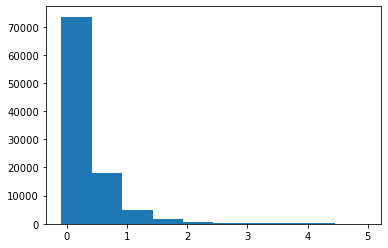

In [9]:
plt.hist(behav_data.rt.values)

In [10]:
import seaborn as sns

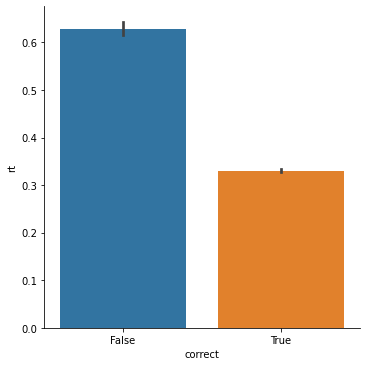

In [109]:
sns.catplot(x='correct', y='rt', data = behav_data, kind="bar")

<AxesSubplot:xlabel='interpolation_point', ylabel='rt'>

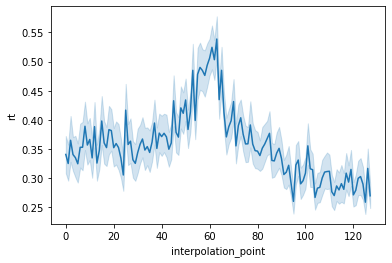

In [110]:
sns.lineplot(x='interpolation_point', y='rt', data = behav_data)

In [111]:
import matplotlib.patches as patches

In [112]:
import re

def hex_to_rgb(hx, hsl=False):
    """Converts a HEX code into RGB or HSL.
    Args:
        hx (str): Takes both short as well as long HEX codes.
        hsl (bool): Converts the given HEX code into HSL value if True.
    Return:
        Tuple of length 3 consisting of either int or float values.
    Raise:
        ValueError: If given value is not a valid HEX code."""
    if re.compile(r'#[a-fA-F0-9]{3}(?:[a-fA-F0-9]{3})?$').match(hx):
        div = 255.0 if hsl else 0
        if len(hx) <= 4:
            return tuple(int(hx[i]*2, 16) / div if div else
                         int(hx[i]*2, 16) for i in (1, 2, 3))
        return tuple(int(hx[i:i+2], 16) / div if div else
                     int(hx[i:i+2], 16) for i in (1, 3, 5))
    raise ValueError(f'"{hx}" is not a valid HEX code.')

In [113]:
L_color = np.array(hex_to_rgb(colors['reinforce']['L']['dark']))/255.
R_color = np.array(hex_to_rgb(colors['reinforce']['R']['dark']))/255.

In [114]:
color_grad = [L_color * i + R_color * (1-i) for i in np.linspace(0,1,128)]

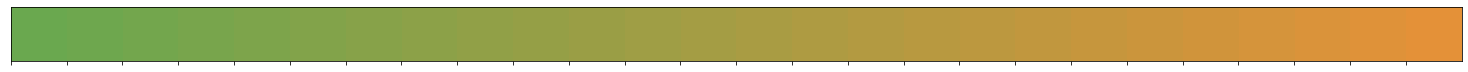

In [115]:
sns.palplot(color_grad[::5])

In [131]:
behav_data[:3]

,session,index,type_,stimulus,class_,response,correct,rt,reward,punish,cue_class,cue_id,cue_prob,num_stims,flip_cues,binary_choice,cueing,left_stim,right_stim,interpolation_point,prob_cue,prob_cued_no_cue,data_file,self_initiated
time,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-17 17:14:06.566014,47.0,20.0,normal,/home/bird/opdat/cdp_stimuli/BG/CR1/CR1_BG_017...,R,R,True,0.703234,False,False,CR,CR1,0.875,3.0,False,False,True,B,G,17.0,0.8,0.2,/mnt/cube/RawData/Magpi/B1597/B1597_trialdata_...,NaN
2021-04-17 17:14:11.846466,47.0,21.0,normal,/home/bird/opdat/cdp_stimuli/AE/CR0/CR0_AE_028...,R,R,True,0.890750,False,False,CR,CR0,0.750,3.0,False,False,True,A,E,28.0,0.8,0.2,/mnt/cube/RawData/Magpi/B1597/B1597_trialdata_...,NaN
2021-04-17 17:14:17.669401,47.0,22.0,normal,/home/bird/opdat/cdp_stimuli/BE/CR1/CR1_BE_120...,L,L,True,0.516516,True,False,CR,CR1,0.875,3.0,False,False,True,B,E,120.0,0.8,0.2,/mnt/cube/RawData/Magpi/B1597/B1597_trialdata_...,NaN


In [133]:
np.where((behav_data.interpolation_point == 127) & (behav_data.left_stim == 'B')  & (behav_data.right_stim == 'F'))

(array([ 1176,  2250,  3243,  3675,  4924,  4926,  8979,  9762, 10431,
        10432, 11116, 11142, 11740, 11811, 17829, 18683, 18720, 19298,
        24769, 25427, 25645, 27440, 30255, 34621, 34646, 35048, 35054,
        35089, 35170, 35268, 39254, 39307, 40012, 40015, 40064, 41136,
        41144, 41390, 41410, 42222, 42730, 45779, 46445, 46859, 46884,
        46893, 47923, 47927, 50511, 50570, 52493, 53149, 55449, 55473,
        55546, 55847, 55883, 56241, 57149, 59705, 62334, 62952, 63212,
        64226, 65230, 65913, 65921, 65923, 67454, 73069, 73071, 73667,
        73688, 74355, 74904, 76616, 80596, 83701, 85140, 87148, 87157,
        87169, 87173, 87185, 87478, 87484, 87486, 87521, 87704, 87725,
        87758, 87765, 87838, 88788, 88808, 89479, 91767, 91907, 91945,
        91964, 93535, 93631, 94561, 97709, 97766, 97767, 99015, 99017,
        99641, 99646, 99713]),)

In [135]:
len(np.where((behav_data.interpolation_point == 127) & (behav_data.left_stim == 'B')  & (behav_data.right_stim == 'F'))[0])

111

In [141]:
n = 2250

(0.0, 4.266951000000001, 0.0, 48.0)

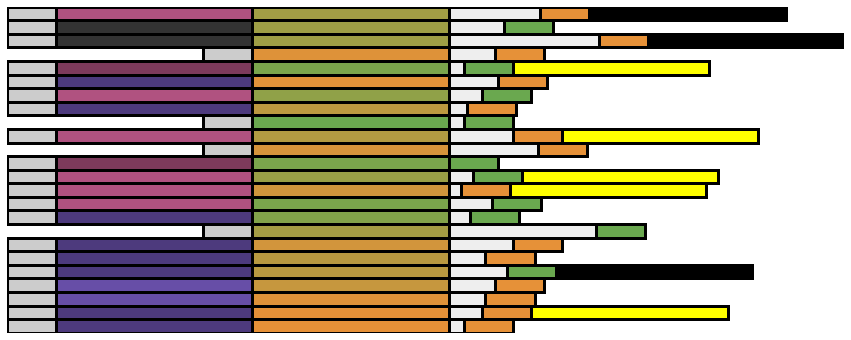

In [143]:
edgecolor = "k"
linewidth = 3
reward_time = 1.0
punish_time = 1.0
row_height = 2
peck_width = 0.25
cue_width = 1
audio_width = 1
max_width = 0
nex = 24
fig, ax = plt.subplots(figsize=(15, 6))
for exi, (idx, row) in enumerate(behav_data[n:n+nex].iterrows()):

    if row.cue_id in ["CN", "CL0", "CL1", "CR0", "CR1"]:
        cur_time = 0
    else:
        cur_time = 1
    # peck
    rect = patches.Rectangle(
        (cur_time, exi * row_height),
        peck_width,
        row_height,
        linewidth=linewidth,
        edgecolor=edgecolor,
        facecolor="#cccccc",
    )
    cur_time += peck_width
    ax.add_patch(rect)

    # cue
    if row.cue_id in ["CN", "CL0", "CL1", "CR0", "CR1"]:
        rect = patches.Rectangle(
            (cur_time, exi * row_height),
            1,
            row_height,
            linewidth=linewidth,
            edgecolor=edgecolor,
            facecolor=colors["cue_pal"][row.cue_id],
        )
        cur_time += 1
        ax.add_patch(rect)

    # stim
    rect = patches.Rectangle(
        (cur_time, exi * row_height),
        1,
        row_height,
        linewidth=linewidth,
        edgecolor=edgecolor,
        facecolor=color_grad[int(row.interpolation_point)],
    )
    cur_time += 1
    ax.add_patch(rect)

    # reaction time
    rect = patches.Rectangle(
        (cur_time, exi * row_height),
        row.rt,
        row_height,
        linewidth=linewidth,
        edgecolor=edgecolor,
        facecolor="#eeeeee",
    )
    cur_time += row.rt
    ax.add_patch(rect)

    # peck
    rect = patches.Rectangle(
        (cur_time, exi * row_height),
        peck_width,
        row_height,
        linewidth=linewidth,
        edgecolor=edgecolor,
        facecolor=colors["reinforce"][row.response]["dark"],
    )
    cur_time += peck_width
    ax.add_patch(rect)

    if row.reward:
        rect = patches.Rectangle(
            (cur_time, exi * row_height),
            reward_time,
            row_height,
            linewidth=linewidth,
            edgecolor=edgecolor,
            facecolor="yellow",
        )
        cur_time += reward_time
        ax.add_patch(rect)

    if row.punish:
        rect = patches.Rectangle(
            (cur_time, exi * row_height),
            punish_time,
            row_height,
            linewidth=linewidth,
            edge˜color=edgecolor,
            facecolor="black",
        )
        cur_time += punish_time
        ax.add_patch(rect)

    max_width = np.max([max_width, cur_time])


ax.set_xlim([0, max_width])
ax.set_ylim([0, (exi + 1) * row_height])
ax.axis("off")

In [25]:
row.cue_id

'CL1'